# REPORTE PRÁCTICA 6: Modelos lineales

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio que permitirá evaluar las condiciones de reinserción social dentro del CERESO "Apodaca" y dentro del Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción. 

El objetivo de esta prásctica es modelar algunos aspectos de los datos recopilados de las encuestas con modelos lineales simples, concluir si los modelos que se obtienen son significativos o no y graficar los resultados.
    
# Desarrollo

Se realizan modelos lineales separando los datos en dos grupos, mujeres y hombre, es decir, los modelos lineales se realizan primero para los datos de los hombres y luego de las mujeres, con el objetivo de encontrar aspectos significativos que condicionen la necesidad de las personas de cometer delitos.

Se filtra los años de sentencia de los los internos hombres con edades mayores a 15 años.


484
312
300
243
543


Text(0, 0.5, 'Años de Sentencia')

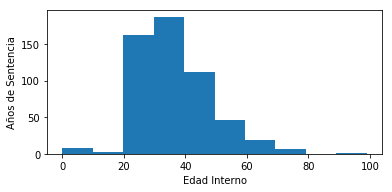

In [69]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica6.csv")
print(len(d))
e = d.loc[d.gender == 'male'] # filtrar por genero, hombres
print(len(e))
d1 = e.loc[e.age >= 16] # Mayores de 16 años de edad
print(len(d1))
d2 = e.loc[~isnan(e.sentenceYears)] 

print(len(d2))
m = pd.concat([d1, d2])
print(len(m))
d = m.age.dropna()

plt.rcParams["figure.figsize"] = [6, 9]
f = plt.figure()  

sf = f.add_subplot(312)
sf.hist(d)
sf.set_xlabel("Edad Interno")
sf.set_ylabel("Años de Sentencia")


En las gráficas anteriores se ve que en el caso de los hombres siguen una distribución aparentente normal. Luego se comienzan modelar los años de sentencia como una función de la edad de los internos hombres.

y = f(x) = 0.0817 x + 12.0093
error 0.06292450975594598
valor p 0.19544903608298309
pendiente no significativo
R^2 0.006944806502868976


Text(0, 0.5, 'Sentencia Hombres')

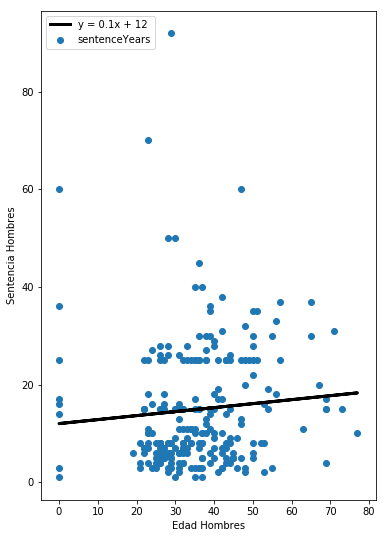

In [62]:
# Hombres internos, edad y años de sentencia
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
e = o.loc[o.gender == 'male']
m = e.loc[~isnan(e.age > 16)]
x = m.age
y = m.sentenceYears 
 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'black', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Edad Hombres")
plt.ylabel("Sentencia Hombres")


Se obtiene una pendiente no significativa, el error es pequeño y se nota que van aumentando los años de sentencia con la edad, o que la edad de los hombres condiciona de algún modo la cantidad de años que les impongan. A medida que van creciendo los años de edad, va creciendo levemente los años de sentencia.

Además, se trabaja con los ingresos mensuales y los años de sentencia de los internos hombres, dado que puede ser que tenga valor significativo el hecho de tener menos dinero a cometer delitos más o menos graves y por consecuencia mayor o menor cantidad de años. Los ingresos mensuales antes de entrar a la prisión se registran en la encuesta de la siguiente forma:

1. Menos de 3,000
2. De 3,001 a 6,000
3. De 6,001 a 9,000
4. Más de 9,000 

Se intenta modelar los años de sentencia en función de la cantidad de dinero que tenían los internos hombres mensualmente.


y = f(x) = -1.6490 x + 18.0927
error 0.7573076672582115
valor p 0.030488607756852505
pendiente significativo
R^2 0.020637081133893283


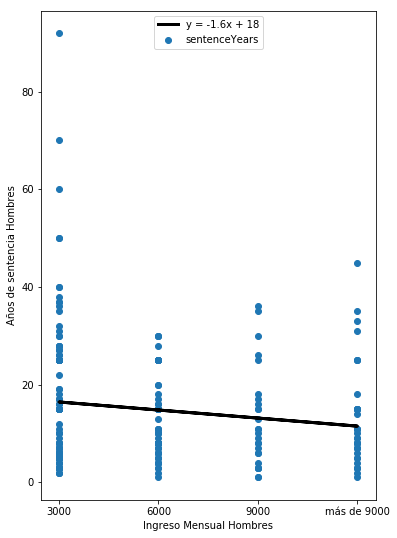

Si gana menos de 3000, aproximado sentencia 18
Si gana más de 9000, aproximado sentencia 16


In [71]:
# Hombres internos, años de sentencia e ingresos mensuales
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
e = o.loc[o.gender == 'male']
m = e.loc[~isnan(e.age> 16)]

y = m.sentenceYears # modelando
x = m.incomePrev #  en función de y = f(x) = a * x + b

mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'black', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper center')
plt.xlabel("Ingreso Mensual Hombres")
plt.xticks([1, 2, 3, 4], ["3000", "6000", "9000", "más de 9000"])
plt.ylabel("Años de sentencia Hombres")
plt.show()

print("Si gana menos de 3000, aproximado sentencia {:.0f}".format(b))
print("Si gana más de 9000, aproximado sentencia {:.0f}".format(a + b))


Se obtiene una pendiente significativa, se nota que la pendiente baja a medida que más ingresos mensuales tenga el interno, parece que mientras más ingresos mensuales tengan los hombres, el delito a cometer es más leve, o pudiera decirse que los años de sentencia de los hombres se pueden estimar como -1,6 veces del ingreso mensual más 18, aproximadamente.

Se realiza estos mismos trabajos con las mujeres internas, primero se investiga la relación entre los años de sentencia que con la edad de las internas usando la misma metodología.


y = f(x) = 0.1386 x + 11.5369
error 0.16527383815723537
valor p 0.40422363964375885
pendiente no significativo
R^2 0.00829724724138278


Text(0, 0.5, 'Sentencia Mujeres')

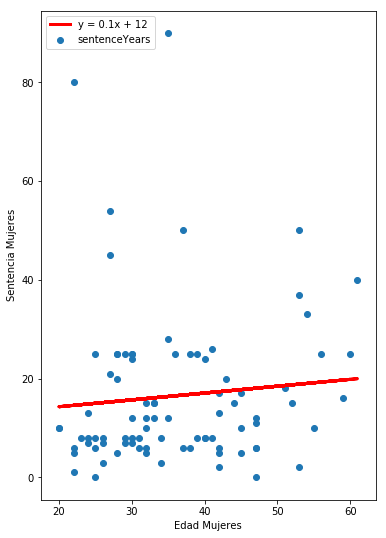

In [59]:
# Mujeres internas, edad y años de sentencia
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
e = o.loc[o.gender == 'female']
m = e.loc[~isnan(e.age > 16)]
x = m.age
y = m.sentenceYears 
 
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("Edad Mujeres")
plt.ylabel("Sentencia Mujeres")


Se obtiene pendiente no significativa en este caso, se prueba entonces con los años de sentencia y su relación con los ingresos mensuales de las mujeres.

y = f(x) = -0.1476 x + 17.0992
error 1.8303303884164583
valor p 0.9359475964444619
pendiente no significativo
R^2 9.427632609560544e-05


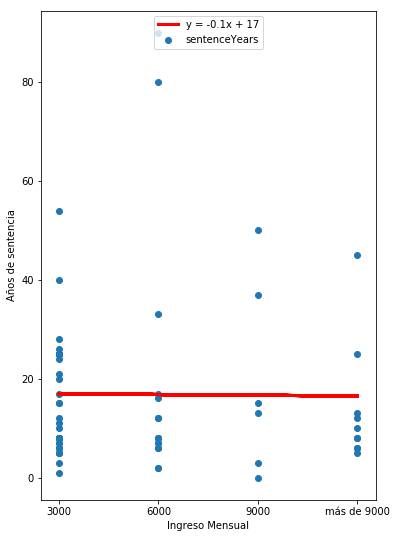

Si gana menos de 3000, aproximado sentencia 17
Si gana más de 9000, aproximado sentencia 17


In [60]:
# Mujeres internas, años de sentencia e ingresos mensuales
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6.csv")
e = o.loc[o.gender == 'female']
m = e.loc[e.age >= 16]

y = m.sentenceYears # modelando
x = m.incomePrev #  en función de y = f(x) = a * x + b

mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper center')
plt.xlabel("Ingreso Mensual")
plt.xticks([1, 2, 3, 4], ["3000", "6000", "9000", "más de 9000"])
plt.ylabel("Años de sentencia")
plt.show()

print("Si gana menos de 3000, aproximado sentencia {:.0f}".format(b))
print("Si gana más de 9000, aproximado sentencia {:.0f}".format(a + b))


De igual modo la pendiente no es significativa para esta relación en el caso de las mujeres internas, esto puede ser debido a que los datos de las mujeres al parecer no están cerca de ser normalmente distribuidos, por tanto, vamos a revisar como se encuentran estos datos en las mujeres.

484
172
171
86
257


Text(0, 0.5, 'Años de Sentencia')

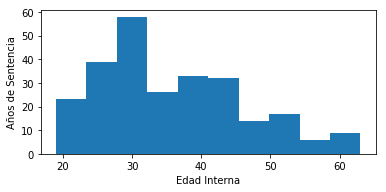

In [63]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica6.csv")
print(len(d))
e = d.loc[d.gender == 'female'] # filtrar por genero, mujeres
print(len(e))
d1 = e.loc[e.age >= 16] # Mayores de 16 años de edad
print(len(d1))
d2 = e.loc[~isnan(e.sentenceYears)] 

print(len(d2))
m = pd.concat([d1, d2])
print(len(m))
d = m.age.dropna()

plt.rcParams["figure.figsize"] = [6, 9]
f = plt.figure()  

sf = f.add_subplot(312)
sf.hist(d)
sf.set_xlabel("Edad Interna")
sf.set_ylabel("Años de Sentencia")



Como se ve en las gráficas anteriores la distribución de los datos de las mujeres no están nada normales, pudiendo ser esto la causa de los resultados no significativos obtenidos anteriormente.

MannwhitneyuResult(statistic=18191.5, pvalue=0.008141761326959098)


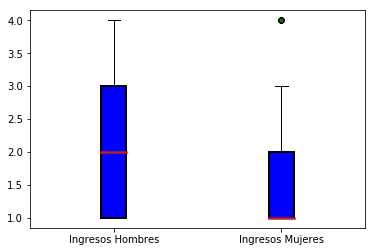

In [34]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica6.csv")
hombre = d.loc[d.gender == 'male'] 
mujer = d.loc[d.gender == 'female'] 
h = hombre.incomePrev.dropna()
m = mujer.incomePrev.dropna()
print(mannwhitneyu(h, m))

bp = dict(linestyle='-', linewidth = 2, color='black', facecolor='blue')
fp = dict(marker = 'o', markerfacecolor = 'green', markersize = 5, linestyle = 'none')
mp = dict(linestyle = '-', linewidth = 2.5, color ='firebrick')
plt.boxplot([h, m], labels=["Ingresos Hombres", "Ingresos Mujeres"], \
            boxprops = bp, flierprops = fp, medianprops = mp, patch_artist = True)
plt.show()

El diagrama anterior muestra una diferencia un poco más significativa en cuanto a los ingresos mensuales entre los hombres y mujeres, siendo las mujeres las de menos ingresos, pudiendo ser esto una de las causas probables de llevarlas a cometer delitos.

En resumen, ninguno de los modelos anteriores fue muy bueno, los datos no se encuentran normalmente distribuidos y esto no ayuda los modelos. A pesar de esto se pudo apreciar que en el caso de los hombres puede existir una relación de dependencia de los años de sentencia con respecto a la edad de los internos, y un poco más con la cantidad de dinero que tenían como ingreso mensual, cosa que en el caso de las mujeres no se comportó de esta manera, por lo cual valdría la pena seguir revisando que factores condicionan el hecho de que las mujeres cometan ciertos delitos.
